In [15]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt

In [16]:
train_path = r'../input/100-bird-species/train'
valid_path = r'../input/100-bird-species/valid'

train_dataset = image_dataset_from_directory(train_path,
                                            seed = 2059,
                                            image_size = (224, 224),
                                            label_mode = 'int', 
                                            batch_size = 16)


valid_dataset = image_dataset_from_directory(valid_path,
                                            seed = 2059,
                                            image_size = (224, 224),
                                            label_mode = 'int',
                                            batch_size = 16)

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [17]:
labels = train_dataset.class_names
print(len(labels))

400


In [18]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

base_model = EfficientNetB0(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [19]:
model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dropout(0.2))

model.add(Dense(len(labels), activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               512400    
Total params: 4,561,971
Trainable params: 512,400
Non-trainable params: 4,049,571
_________________________________________________________________


In [20]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

model.compile(optimizer = Adam(learning_rate = 0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [21]:
checkpoint = ModelCheckpoint('./Bird_species_classfier.h5',
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only = True,
                            verbose = 1)


callbacks = EarlyStopping(monitor = 'val_loss',
                          mode = 'min',
                          patience = 5,
                          restore_best_weights = True,
                          verbose = 1)

In [22]:
history = model.fit(x = train_dataset,
                   epochs = 20,
                   callbacks = [callbacks, checkpoint],
                   validation_data = valid_dataset)

Epoch 1/20
3650/3650 [==============================] - 236s 63ms/step - loss: 1.0356 - accuracy: 0.8123 - val_loss: 0.1814 - val_accuracy: 0.9635

Epoch 00001: val_loss improved from inf to 0.18137, saving model to ./Bird_species_classfier.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
3650/3650 [==============================] - 104s 28ms/step - loss: 0.2721 - accuracy: 0.9368 - val_loss: 0.1260 - val_accuracy: 0.9720

Epoch 00002: val_loss improved from 0.18137 to 0.12599, saving model to ./Bird_species_classfier.h5
Epoch 3/20
3650/3650 [==============================] - 108s 30ms/step - loss: 0.1768 - accuracy: 0.9570 - val_loss: 0.1083 - val_accuracy: 0.9725

Epoch 00003: val_loss improved from 0.12599 to 0.10832, saving model to ./Bird_species_classfier.h5
Epoch 4/20
3650/3650 [==============================] - 103s 28ms/step - loss: 0.1310 - accuracy: 0.9677 - val_loss: 0.0947 - val_accuracy: 0.9725

Epoch 00004: val_loss improved from 0.10832 to 0.09475, saving model to ./Bird_species_classfier.h5
Epoch 5/20
3650/3650 [==============================] - 104s 28ms/step - loss: 0.1062 - accuracy: 0.9736 - val_loss: 0.0949 - val_accuracy: 0.9745

Epoch 00005: val_loss did not improve from 0.09475
Epoch 6/20
3650/3650 [==============================] - 1

In [23]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.035648,0.812290,0.181374,0.9635
1,0.272067,0.936785,0.125990,0.9720
2,0.176831,0.957029,0.108318,0.9725
3,0.131022,0.967716,0.094747,0.9725
4,0.106247,0.973556,0.094934,0.9745


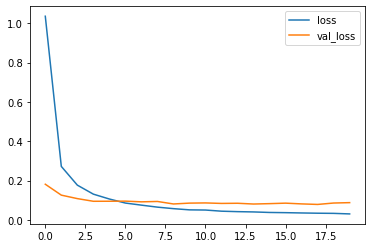

In [24]:
plt.plot(history_df.loc[ : , 'loss'], label = 'loss')
plt.plot(history_df.loc[ : , 'val_loss'], label = 'val_loss')
plt.legend()

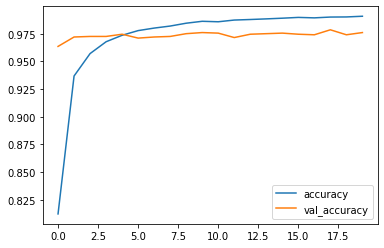

In [25]:
plt.plot(history_df.loc[ : , 'accuracy'], label = 'accuracy')
plt.plot(history_df.loc[ : , 'val_accuracy'], label = 'val_accuracy')
plt.legend()

In [26]:
test_path = '../input/100-bird-species/test'

test_dataset = image_dataset_from_directory(test_path,
                                            batch_size = 16,
                                            seed = 2059,
                                            label_mode = 'int',
                                            image_size = (224, 224))

Found 2000 files belonging to 400 classes.


In [27]:
score = model.evaluate(test_dataset)
score

125/125 [==============================] - 8s 59ms/step - loss: 0.0496 - accuracy: 0.9870


[0.04962505027651787, 0.9869999885559082]